<a href="https://colab.research.google.com/github/SergioCortes98/Aprendizaje-Automatico/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final
## Sergio Cortes Cepeda
##Matricula:1731225

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.cluster import DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
# Cargar tus datos
ruta = "/content/sample_data/run_activitiesAA.csv"
df = pd.read_csv(ruta, encoding='latin-1')
df.head(48)


,Tipo de actividad,Fecha,TÃ­tulo,Distancia,CalorÃ­as,Tiempo,Frecuencia cardiaca media,FC mÃ¡xima,Cadencia de carrera media,Cadencia de carrera mÃ¡xima,...,Ascenso total,Descenso total,Longitud media de zancada,Pasos,Mejor tiempo de vuelta,NÃºmero de vueltas,Tiempo en movimiento,Tiempo transcurrido,Altura mÃ­nima,Altura mÃ¡xima
0,Carrera,09/11/2025 07:06,Monterrey Carrera,30.43,"2,435",03:13:09,173,190,173,185,...,225,225,0.91,"33,436",02:58.7,31,03:12:22,03:13:09,515,574
1,Carrera,02/11/2025 06:47,San Pedro Garza GarcÃ­a Carrera,7.45,573,00:44:38,164,176,175,188,...,--,--,0.95,"7,896",03:03.5,8,00:44:28,00:44:38,598,602
2,Carrera,26/10/2025 06:37,Guadalupe Carrera,14.74,"1,235",01:32:22,176,191,169,188,...,181,180,0.94,"15,654",04:42.0,15,01:32:19,01:32:22,482,531
3,Carrera,05/10/2025 07:07,San Pedro Garza GarcÃ­a Carrera,12.12,990,01:14:00,174,191,167,177,...,173,172,0.98,"12,384",00:45.8,13,01:13:49,01:14:00,593,639
4,Carrera,07/06/2025 08:23,Carrera,2.61,256,00:19:22,164,184,162,224,...,--,--,0.83,"3,150",04:22.9,3,00:19:17,00:19:22,--,--
5,Carrera,06/06/2025 19:43,San NicolÃ¡s de los Garza Carrera,2.73,307,00:24:49,163,189,138,176,...,--,--,0.78,"3,564",01:36.9,10,00:23:59,00:24:49,496,498
6,Entrenamiento en cinta,11/05/2025 12:24,Entrenamiento en cinta,10.27,789,01:00:06,165,177,160,173,...,--,--,1.01,"9,662",04:39.6,10,00:59:33,01:00:06,--,--
7,Entrenamiento en cinta,20/04/2025 15:05,Entrenamiento en cinta,4.70,409,00:30:02,169,185,156,185,...,--,--,0.66,"4,666",04:13.1,5,00:29:53,00:30:03,--,--
8,Carrera,06/04/2025 12:48,San NicolÃ¡s de los Garza Carrera,3.75,296,00:26:48,153,179,160,180,...,7,14,0.87,"4,316",05:58.6,4,00:26:47,00:26:48,487,499
9,Carrera en interiores,29/03/2025 08:19,Carrera en interiores,3.95,256,00:23:22,145,169,155,198,...,--,--,1.08,"3,662",00:00.8,8,00:20:53,00:40:25,--,--


In [2]:
# Renombrar columnas

df = df.rename(columns={
    "Tipo de actividad": "tipo",
    "Fecha": "fecha",
    "TÃ­tulo": "titulo",
    "Distancia": "distancia_km",
    "CalorÃ­as": "calorias",
    "Tiempo": "Tiempo_Total",
    "Frecuencia cardiaca media": "fc_media",
    "FC mÃ¡xima": "fc_max",
    "Cadencia de carrera media": "cadencia_media",
    "Cadencia de carrera mÃ¡xima": "cadencia_max",
    "Ritmo medio": "ritmo_medio",
    "Ritmo Ã³ptimo": "ritmo_optimo",
    "Ascenso total": "ascenso",
    "Descenso total": "descenso",
    "Longitud media de zancada": "zancada_m",
    "Pasos": "pasos",
    "Mejor tiempo de vuelta": "mejor_vuelta",
    "NÃºmero de vueltas": "num_vueltas",
    "Tiempo en movimiento": "tiempo_mov",
    "Tiempo transcurrido": "tiempo_trans",
    "Altura mÃ­nima": "alt_min",
    "Altura mÃ¡xima": "alt_max"
})
df.columns

Index(['tipo', 'fecha', 'titulo', 'distancia_km', 'calorias', 'Tiempo_Total',
       'fc_media', 'fc_max', 'cadencia_media', 'cadencia_max', 'ritmo_medio',
       'ritmo_optimo', 'ascenso', 'descenso', 'zancada_m', 'pasos',
       'mejor_vuelta', 'num_vueltas', 'tiempo_mov', 'tiempo_trans', 'alt_min',
       'alt_max'],
      dtype='object')

In [3]:
import numpy as np
import pandas as pd

## Columnas que deben ser numéricas
cols_numericas = [
    "pasos","calorias","alt_min", "alt_max"
]

## Limpieza y conversión
for col in cols_numericas:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                   # convierte todo a texto
            .str.replace(",", "", regex=False)  # elimina comas
            .str.replace("--", "", regex=False) # elimina guiones
            .str.replace(":", ".", regex=False) # cambia ":" por "." si aplica
            .str.strip()                        # quita espacios
            .replace("", np.nan)                # convierte vacíos en NaN
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")  #conversión a numérico

## Verificación
print(df[cols_numericas].dtypes)

pasos         int64
calorias      int64
alt_min     float64
alt_max     float64
dtype: object


In [4]:
def time_convert(x):
    x = str(x).strip()

    if x in ["", "-", "--", "nan", "NaN"]:
        return None

    parts = x.split(":")


    if len(parts) == 3:
        h = int(parts[0])
        m = int(parts[1])
        s = float(parts[2])   # aquí permite decimales
        return int(h*3600 + m*60 + s)
    elif len(parts) == 2:
        h = 0
        m = int(parts[0])
        s = float(parts[1].replace(',', '.'))
        return int(h*3600 + m*60 + s)

In [5]:
df.Tiempo_Total=df.Tiempo_Total.apply(time_convert)

In [6]:
df.ritmo_medio=df.ritmo_medio.apply(time_convert)

In [7]:
df.ritmo_optimo=df.ritmo_optimo.apply(time_convert)

In [8]:
df.tiempo_mov=df.tiempo_mov.apply(time_convert)

In [9]:
df = df.drop(columns=["tiempo_trans", "mejor_vuelta"])

En base a los datos supervisados, se observa una similitud amplia entre el tiempo transcurrido y el tiempo total, por lo cual se toma la decisión de eliminar esta columna.

A su vez tengo 2 columnas tiempo en vueltas y numero de vueltas de las que es un dato inexacto debido a que el número de vueltas es el aproximado al kilómetro, sin embargo el mejor tiempo en vueltas muestra datos que serían físicamente imposibles de aplicar por lo cual, hare omisión de esta columna para poder continuar de manera correcta mi análisis.

In [11]:
print(df.dtypes)

tipo               object
fecha              object
titulo             object
distancia_km      float64
calorias            int64
Tiempo_Total        int64
fc_media            int64
fc_max              int64
cadencia_media      int64
cadencia_max        int64
ritmo_medio         int64
ritmo_optimo        int64
ascenso            object
descenso           object
zancada_m         float64
pasos               int64
num_vueltas         int64
tiempo_mov          int64
alt_min           float64
alt_max           float64
dtype: object


##**Modelos Supervisados**

In [12]:
# VARIABLES PARA CALORÍAS Y RITMO_MEDIO

# Variables predictoras
features = [
    "distancia_km",
    "fc_media",
    "fc_max",
    "cadencia_media",
    "cadencia_max",
    "zancada_m",
    "pasos"
]

# Las dos variables objetivo
targets = ["calorias", "ritmo_medio"]

# Número máximo de variables a seleccionar en SelectKBest
k = min(5, len(features))

# Aquí guardaremos todo el resumen
resultados_select = []

for target in targets:
    print("\n" + "="*80)
    print(f"SELECCIÓN DE VARIABLES PARA LA VARIABLE OBJETIVO: {target.upper()}")
    print("="*80)

    # Filtrar filas completas para features + target
    data = df[features + [target]].dropna()

    X = data[features]
    y = data[target]

    # Escalar para que las pruebas funcionen mejor
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # SelectKBest - F (f_regression)
    skb_f = SelectKBest(score_func=f_regression, k=k)
    skb_f.fit(X_scaled, y)

    scores_f = skb_f.scores_
    pvalues_f = skb_f.pvalues_

    # SelectKBest - Mutual Information
    skb_mi = SelectKBest(score_func=mutual_info_regression, k=k)
    skb_mi.fit(X_scaled, y)

    scores_mi = skb_mi.scores_

    # RFE con Regresión Lineal
    lin = LinearRegression()
    n_feat_rfe = min(4, len(features))
    rfe = RFE(estimator=lin, n_features_to_select=n_feat_rfe)
    rfe.fit(X_scaled, y)

    rfe_support = rfe.support_
    rfe_ranking = rfe.ranking_   # 1 = más importante

    #Resumen
    resumen = pd.DataFrame({
        "target": target,
        "variable": features,
        "F_score": scores_f,
        "p_value": pvalues_f,
        "MI_score": scores_mi,
        "RFE_selected": rfe_support,
        "RFE_ranking": rfe_ranking
    })

    # resumen global
    resultados_select.append(resumen)

    # Mostrar ordenado por F_score (para esa variable objetivo)
    display(resumen.sort_values("F_score", ascending=False))

# DataFrame final con TODO (dos objetivos juntos)
resultados_select_df = pd.concat(resultados_select, ignore_index=True)
resultados_select_df



SELECCIÓN DE VARIABLES PARA LA VARIABLE OBJETIVO: CALORIAS


,target,variable,F_score,p_value,MI_score,RFE_selected,RFE_ranking
0,calorias,distancia_km,4451.984630,1.206596e-46,1.192602,True,1
6,calorias,pasos,3393.816651,5.055193e-44,1.128561,True,1
1,calorias,fc_media,23.206428,1.685852e-05,0.280482,True,1
2,calorias,fc_max,15.183375,3.212947e-04,0.194918,False,2
3,calorias,cadencia_media,8.501710,5.514415e-03,0.165426,True,1
5,calorias,zancada_m,2.202450,1.447628e-01,0.343000,False,3
4,calorias,cadencia_max,0.032160,8.584812e-01,0.065642,False,4



SELECCIÓN DE VARIABLES PARA LA VARIABLE OBJETIVO: RITMO_MEDIO


,target,variable,F_score,p_value,MI_score,RFE_selected,RFE_ranking
2,ritmo_medio,fc_max,64.777460,2.930851e-10,0.464082,True,1
3,ritmo_medio,cadencia_media,62.836997,4.403634e-10,0.373641,True,1
1,ritmo_medio,fc_media,52.695296,4.212320e-09,0.617549,False,2
5,ritmo_medio,zancada_m,35.338243,3.773123e-07,0.510786,False,3
4,ritmo_medio,cadencia_max,16.265885,2.104079e-04,0.390325,False,4
0,ritmo_medio,distancia_km,7.330779,9.547612e-03,0.243395,True,1
6,ritmo_medio,pasos,5.127348,2.841804e-02,0.069078,True,1


,target,variable,F_score,p_value,MI_score,RFE_selected,RFE_ranking
0,calorias,distancia_km,4451.984630,1.206596e-46,1.192602,True,1
1,calorias,fc_media,23.206428,1.685852e-05,0.280482,True,1
2,calorias,fc_max,15.183375,3.212947e-04,0.194918,False,2
3,calorias,cadencia_media,8.501710,5.514415e-03,0.165426,True,1
4,calorias,cadencia_max,0.032160,8.584812e-01,0.065642,False,4
5,calorias,zancada_m,2.202450,1.447628e-01,0.343000,False,3
6,calorias,pasos,3393.816651,5.055193e-44,1.128561,True,1
7,ritmo_medio,distancia_km,7.330779,9.547612e-03,0.243395,True,1
8,ritmo_medio,fc_media,52.695296,4.212320e-09,0.617549,False,2
9,ritmo_medio,fc_max,64.777460,2.930851e-10,0.464082,True,1


In [13]:
# Selección de variables para el modelo de calorías
vars_calorias = ["distancia_km", "pasos", "fc_media", "cadencia_media"]

X = df[vars_calorias]
y = df["calorias"]

# Escalar variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=400, random_state=42)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 25.30100000000001
RMSE: 29.402796231821224
R²: 0.9091026783461256


In [16]:
import pandas as pd
import numpy as np

importances = rf.feature_importances_
ranking = pd.DataFrame({
    "variable": vars_calorias,
    "importancia": importances
}).sort_values("importancia", ascending=False)

ranking


,variable,importancia
0,distancia_km,0.428733
1,pasos,0.421386
2,fc_media,0.118898
3,cadencia_media,0.030983


In [17]:
##No lo usare este para mi Articulo
import statsmodels.api as sm
modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                                 OLS Regression Results                                
Dep. Variable:               calorias   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              4830.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):                    2.00e-56
Time:                        20:11:56   Log-Likelihood:                         -218.32
No. Observations:                  47   AIC:                                      444.6
Df Residuals:                      43   BIC:                                      452.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#Variable Objetivo Calorias
La predicción de las calorías está dominada por variables de volumen (distancia, pasos) y por la intensidad cardiovascular (fc_media, fc_max). Variables biomecánicas como la zancada o la cadencia aportan menor contribución.

#Variable Objetivo Ritmo Medio
El ritmo promedio se explica principalmente por indicadores fisiológicos de intensidad (fc_max, fc_media) y por variables relacionadas con técnica de carrera (cadencia_media, zancada_m). La distancia total o el número de pasos son menos relevantes.

In [18]:
# TOP FEATURES PARA CADA VARIABLE OBJETIVO

top_vars_por_target = {}

for target in ["calorias", "ritmo_medio"]:
    sub = resultados_select_df[resultados_select_df["target"] == target]
    top_vars = sub.sort_values("F_score", ascending=False)["variable"].head(4).tolist()
    top_vars_por_target[target] = top_vars
    print(f"Top variables para {target}: {top_vars}")


Top variables para calorias: ['distancia_km', 'pasos', 'fc_media', 'fc_max']
Top variables para ritmo_medio: ['fc_max', 'cadencia_media', 'fc_media', 'zancada_m']


In [19]:
# MODELOS SUPERVISADOS USANDO LAS TOP VARS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

resultados_modelos = []

for target in ["calorias", "ritmo_medio"]:
    print("="*80)
    print(f"ANÁLISIS SUPERVISADO PARA: {target.upper()}")
    print("="*80)

    # 1) Variables seleccionadas para este target
    top_vars = top_vars_por_target[target]
    print("Variables usadas:", top_vars)

    # 2) Construir X, y con esas columnas
    data = df[top_vars + [target]].dropna()
    X = data[top_vars]
    y = data[target]

    # 3) Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 4) Escalado para Regresión Lineal
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ===== Modelo 1: Regresión Lineal =====
    lin_model = LinearRegression()
    lin_model.fit(X_train_scaled, y_train)
    y_pred_lin = lin_model.predict(X_test_scaled)

    mae_lin  = mean_absolute_error(y_test, y_pred_lin)
    mse_lin  = mean_squared_error(y_test, y_pred_lin)
    rmse_lin = np.sqrt(mse_lin)
    r2_lin   = r2_score(y_test, y_pred_lin)

    resultados_modelos.append({
        "Variable objetivo": target,
        "Modelo": "Regresión Lineal",
        "MAE": mae_lin,
        "MSE": mse_lin,
        "RMSE": rmse_lin,
        "R2": r2_lin
    })

    # ===== Modelo 2: Random Forest =====
    rf_model = RandomForestRegressor(
        n_estimators=200,
        random_state=42
    )
    rf_model.fit(X_train, y_train)          # RF sin escalar
    y_pred_rf = rf_model.predict(X_test)

    mae_rf  = mean_absolute_error(y_test, y_pred_rf)
    mse_rf  = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf   = r2_score(y_test, y_pred_rf)

    resultados_modelos.append({
        "Variable objetivo": target,
        "Modelo": "Random Forest",
        "MAE": mae_rf,
        "MSE": mse_rf,
        "RMSE": rmse_rf,
        "R2": r2_rf
    })

    # Tabla de este target
    print("\nResultados para", target)
    display(pd.DataFrame([
        ["Regresión Lineal", mae_lin, mse_lin, rmse_lin, r2_lin],
        ["Random Forest", mae_rf, mse_rf, rmse_rf, r2_rf]
    ], columns=["Modelo", "MAE", "MSE", "RMSE", "R2"]))

# Tabla final
resultados_modelos_df = pd.DataFrame(resultados_modelos)
resultados_modelos_df


ANÁLISIS SUPERVISADO PARA: CALORIAS
Variables usadas: ['distancia_km', 'pasos', 'fc_media', 'fc_max']

Resultados para calorias


,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lineal,23.832842,731.596797,27.048046,0.923079
1,Random Forest,17.592500,548.359868,23.417085,0.942345


ANÁLISIS SUPERVISADO PARA: RITMO_MEDIO
Variables usadas: ['fc_max', 'cadencia_media', 'fc_media', 'zancada_m']

Resultados para ritmo_medio


,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lineal,21.802654,728.163356,26.984502,0.986632
1,Random Forest,21.228000,599.835670,24.491543,0.988988


,Variable objetivo,Modelo,MAE,MSE,RMSE,R2
0,calorias,Regresión Lineal,23.832842,731.596797,27.048046,0.923079
1,calorias,Random Forest,17.592500,548.359868,23.417085,0.942345
2,ritmo_medio,Regresión Lineal,21.802654,728.163356,26.984502,0.986632
3,ritmo_medio,Random Forest,21.228000,599.835670,24.491543,0.988988


In [20]:
import matplotlib.pyplot as plt

def plot_obs_vs_pred(y_test, y_pred, titulo, xlabel, ylabel):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', label="Línea ideal")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_residuals(y_test, y_pred, titulo):
    residuos = y_test - y_pred

    plt.figure(figsize=(6,4))
    plt.hist(residuos, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel("Residuales")
    plt.ylabel("Frecuencia")
    plt.title(titulo)
    plt.grid(True)
    plt.show()


GRÁFICAS PARA LA VARIABLE OBJETIVO: CALORIAS

📌 Gráfica Observado vs Predicho – Regresión Lineal


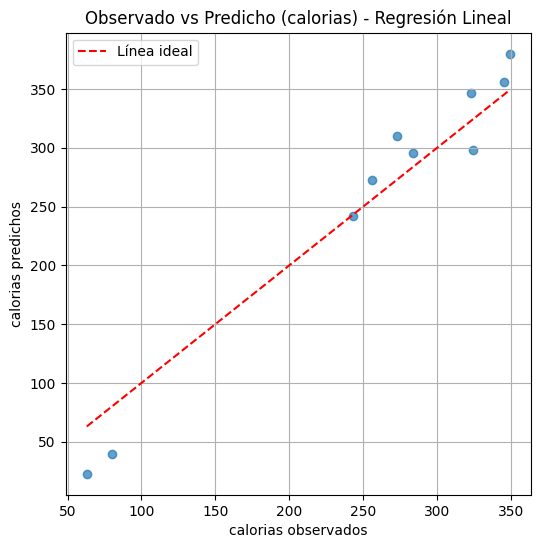


📌 Histograma de Residuales – Regresión Lineal


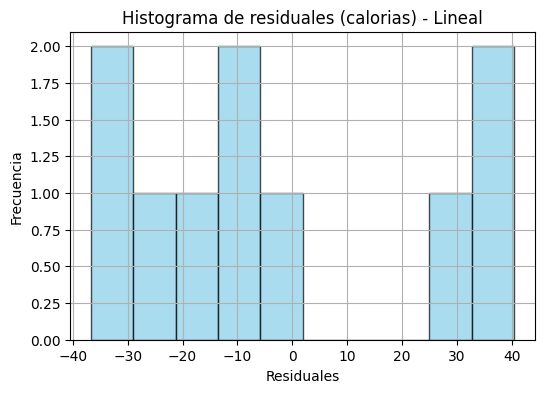


📌 Gráfica Observado vs Predicho – Random Forest


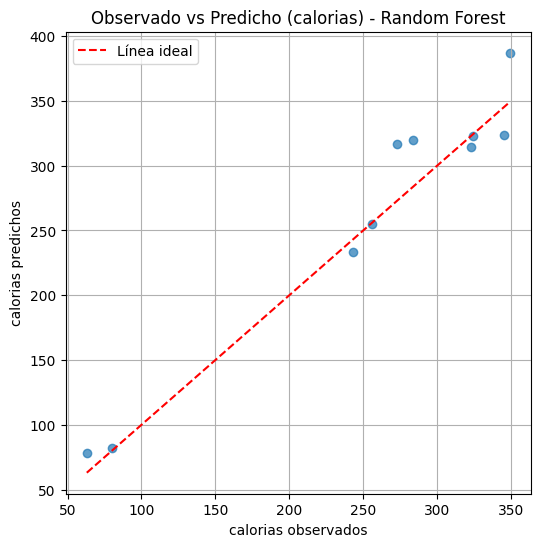


📌 Histograma de Residuales – Random Forest


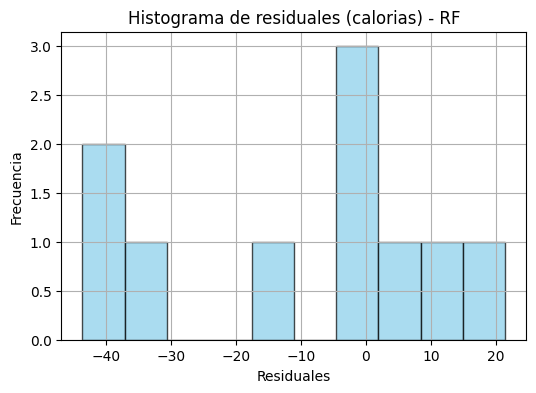

GRÁFICAS PARA LA VARIABLE OBJETIVO: RITMO_MEDIO

📌 Gráfica Observado vs Predicho – Regresión Lineal


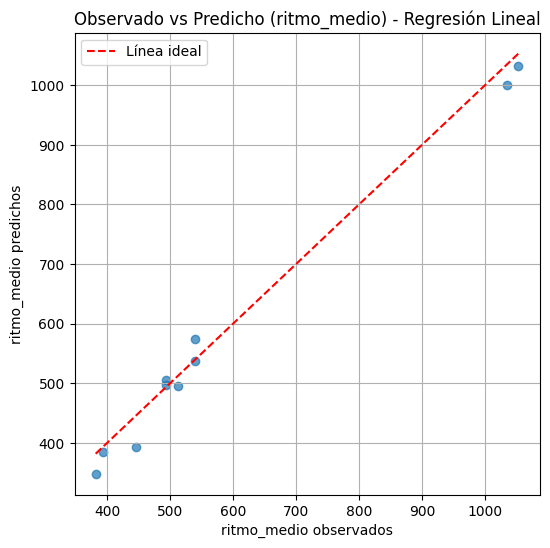


📌 Histograma de Residuales – Regresión Lineal


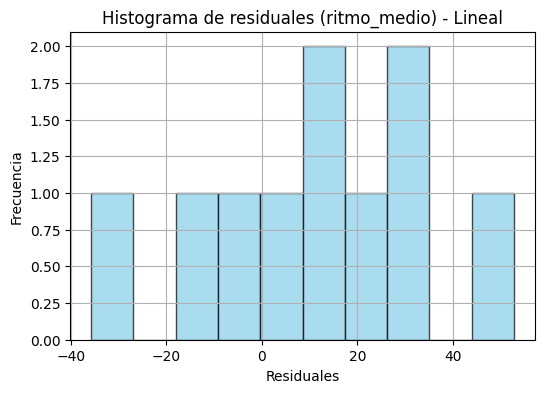


📌 Gráfica Observado vs Predicho – Random Forest


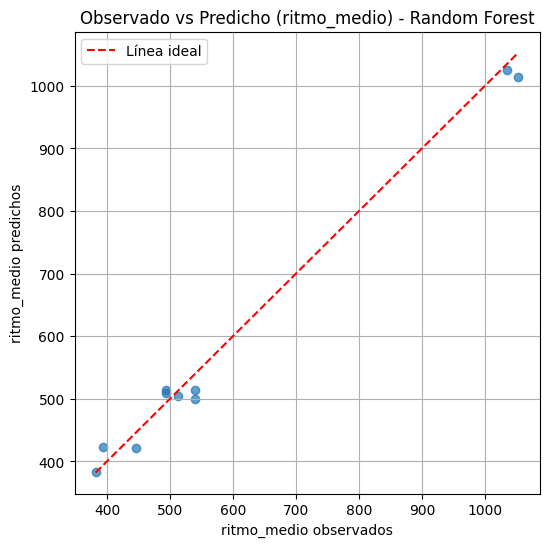


📌 Histograma de Residuales – Random Forest


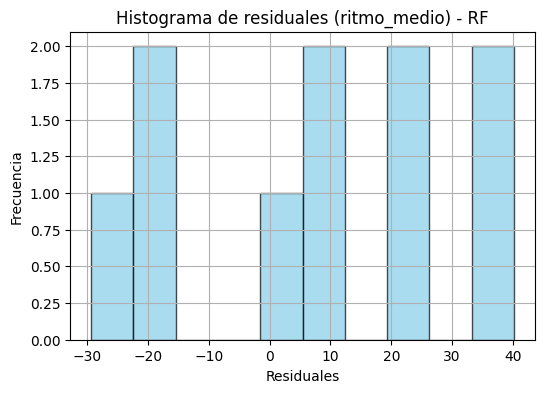

In [21]:
# GRAFICAS POR MODELO Y POR TARGET
for target in ["calorias", "ritmo_medio"]:
    print("="*80)
    print(f"GRÁFICAS PARA LA VARIABLE OBJETIVO: {target.upper()}")
    print("="*80)

    # Crear X, y para este target
    top_vars = top_vars_por_target[target]
    data = df[top_vars + [target]].dropna()
    X = data[top_vars]
    y = data[target]

    # Train test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # REGRESIÓN LINEAL
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lin = LinearRegression()
    lin.fit(X_train_scaled, y_train)
    y_pred_lin = lin.predict(X_test_scaled)

    print("\n📌 Gráfica Observado vs Predicho – Regresión Lineal")
    plot_obs_vs_pred(y_test, y_pred_lin,
                     f"Observado vs Predicho ({target}) - Regresión Lineal",
                     f"{target} observados",
                     f"{target} predichos")

    print("\n📌 Histograma de Residuales – Regresión Lineal")
    plot_residuals(y_test, y_pred_lin,
                   f"Histograma de residuales ({target}) - Lineal")


    # RANDOM FOREST
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    print("\n📌 Gráfica Observado vs Predicho – Random Forest")
    plot_obs_vs_pred(y_test, y_pred_rf,
                     f"Observado vs Predicho ({target}) - Random Forest",
                     f"{target} observados",
                     f"{target} predichos")

    print("\n📌 Histograma de Residuales – Random Forest")
    plot_residuals(y_test, y_pred_rf,
                   f"Histograma de residuales ({target}) - RF")


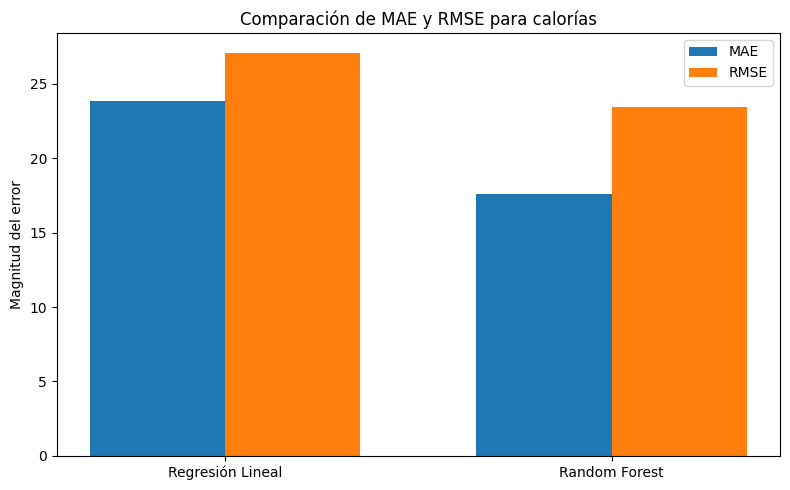

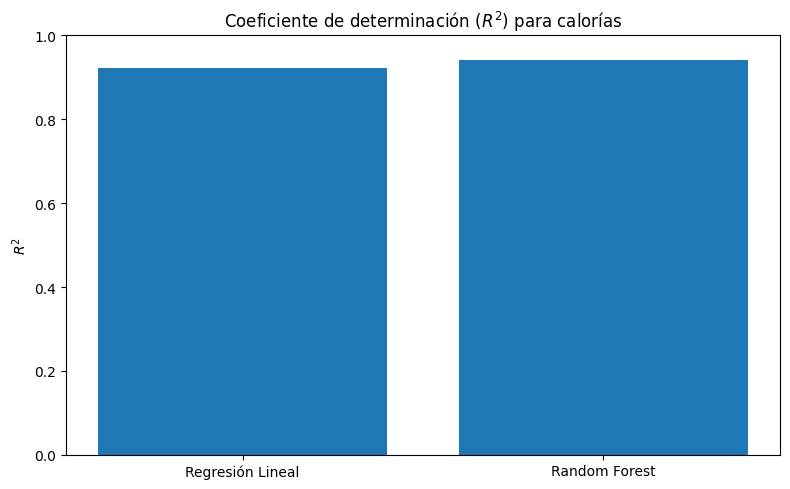

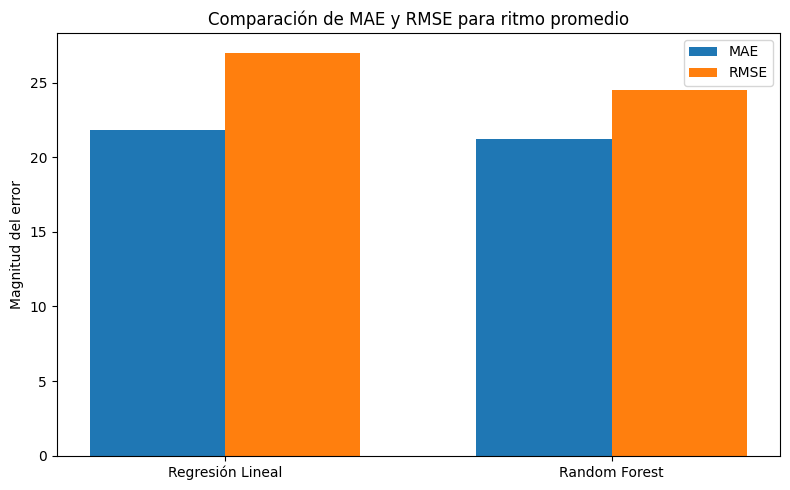

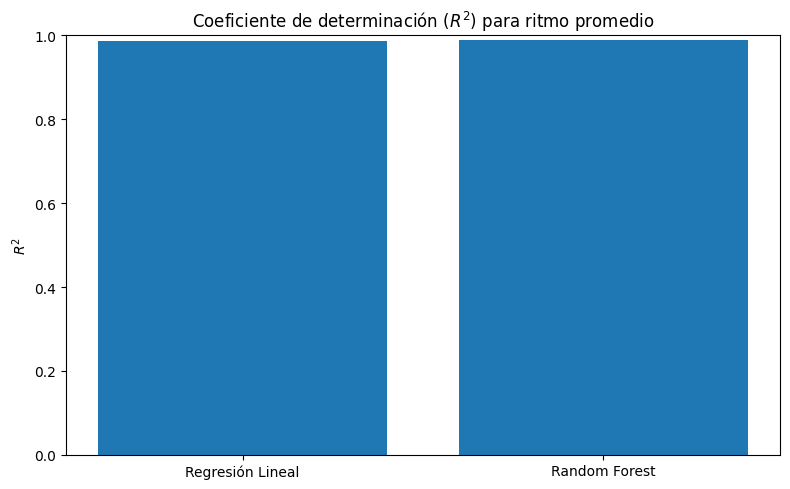

In [43]:
import numpy as np
import matplotlib.pyplot as plt


# 1. MÉTRICAS DE LOS MODELOS


metricas = {
    "calorias": {
        "modelos": ["Regresión Lineal", "Random Forest"],
        "MAE":  [23.83 , 17.59],
        "MSE":  [731.60, 548.36],
        "RMSE": [27.08, 23.42],
        "R2":   [0.9231, 0.9423]
    },
    "ritmo_medio": {
        "modelos": ["Regresión Lineal", "Random Forest"],
        "MAE":  [21.80, 21.23],
        "MSE":  [728.16, 599.83],
        "RMSE": [26.98, 24.49],
        "R2":   [0.9866, 0.9889]
    }
}

# Función auxiliar para hacer la gráfica de MAE y RMSE
def grafica_mae_rmse(nombre_var, datos, guardar_como=None):
    modelos = datos["modelos"]
    mae = datos["MAE"]
    rmse = datos["RMSE"]

    x = np.arange(len(modelos))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, mae, width, label="MAE")
    plt.bar(x + width/2, rmse, width, label="RMSE")

    plt.xticks(x, modelos)
    plt.ylabel("Magnitud del error")
    plt.title(f"Comparación de MAE y RMSE para {nombre_var}")
    plt.legend()
    plt.tight_layout()

    if guardar_como:
        plt.savefig(guardar_como, dpi=300, bbox_inches="tight")
    plt.show()


# Función auxiliar para hacer la gráfica de R^2
def grafica_r2(nombre_var, datos, guardar_como=None):
    modelos = datos["modelos"]
    r2 = datos["R2"]
    x = np.arange(len(modelos))

    plt.figure(figsize=(8, 5))
    plt.bar(x, r2)
    plt.xticks(x, modelos)
    plt.ylabel("$R^2$")
    plt.ylim(0, 1)  # porque son valores entre 0 y 1
    plt.title(f"Coeficiente de determinación ($R^2$) para {nombre_var}")
    plt.tight_layout()

    if guardar_como:
        plt.savefig(guardar_como, dpi=300, bbox_inches="tight")
    plt.show()


# 2. COMPARACIÓN PARA CALORÍAS

grafica_mae_rmse(
    "calorías",
    metricas["calorias"],
    guardar_como="calorias_comp_mae_rmse.png"
)

grafica_r2(
    "calorías",
    metricas["calorias"],
    guardar_como="calorias_comp_r2.png"
)


# 3. COMPARACIÓN PARA RITMO_MEDIO

grafica_mae_rmse(
    "ritmo promedio",
    metricas["ritmo_medio"],
    guardar_como="ritmo_comp_mae_rmse.png"
)

grafica_r2(
    "ritmo promedio",
    metricas["ritmo_medio"],
    guardar_como="ritmo_comp_r2.png"
)


##Comentario con respecto al a la variable **calorias** y su Modelo

Comparando ambas metodologías, Random Forest ofrece un ajuste visible y cuantitativamente superior para la estimación de calorías. Mientras la regresión lineal capta adecuadamente la tendencia general, Random Forest reduce la dispersión de los errores, se ajusta mejor a valores altos y bajos, y presenta una distribución de residuales más compacta y centrada. Esto confirma que la relación entre distancia, pasos y variables de frecuencia cardíaca presenta componentes no lineales que este modelo captura de manera más efectiva.

##Comentario con respecto al a la variable **ritmo medio** y su Modelo

Tanto la regresión lineal como Random Forest tienen un desempeño sobresaliente para predecir ritmo promedio, con R² superiores al 98%. Sin embargo, Random Forest presenta una ligera ventaja: produce errores más pequeños y una distribución de residuales más compacta y centrada. Esto indica que las interacciones entre frecuencia cardíaca, cadencia y longitud de zancada contienen patrones no lineales que Random Forest puede capturar de manera más efectiva que un modelo lineal.

##**Modelos no Supervisados**

In [23]:
print(df.dtypes)

tipo               object
fecha              object
titulo             object
distancia_km      float64
calorias            int64
Tiempo_Total        int64
fc_media            int64
fc_max              int64
cadencia_media      int64
cadencia_max        int64
ritmo_medio         int64
ritmo_optimo        int64
ascenso            object
descenso           object
zancada_m         float64
pasos               int64
num_vueltas         int64
tiempo_mov          int64
alt_min           float64
alt_max           float64
dtype: object


In [24]:

# 3. Seleccionar variables numéricas para PCA


# EJEMPLO: ajusta esta lista con tus nombres de columnas reales
vars_pca = [
    "distancia_km",
    "calorias",
    "Tiempo_Total",
    "fc_media",
    "fc_max",
    "cadencia_media",
    "cadencia_max",
    "ritmo_medio",
    "zancada_m",
    "pasos",
    "num_vueltas",
    "tiempo_mov",
    "alt_min",
    "alt_max"

]

# Nos quedamos solo con esas columnas y eliminamos filas con NA
X = df[vars_pca].dropna()

print("Tamaño de la matriz para PCA:", X.shape)
X.head(48)


Tamaño de la matriz para PCA: (14, 14)


,distancia_km,calorias,Tiempo_Total,fc_media,fc_max,cadencia_media,cadencia_max,ritmo_medio,zancada_m,pasos,num_vueltas,tiempo_mov,alt_min,alt_max
0,30.43,2435,11589,173,190,173,185,381,0.91,33436,31,11542,515.0,574.0
1,7.45,573,2678,164,176,175,188,359,0.95,7896,8,2668,598.0,602.0
2,14.74,1235,5542,176,191,169,188,376,0.94,15654,15,5539,482.0,531.0
3,12.12,990,4440,174,191,167,177,366,0.98,12384,13,4429,593.0,639.0
5,2.73,307,1489,163,189,138,176,546,0.78,3564,10,1439,496.0,498.0
8,3.75,296,1608,153,179,160,180,429,0.87,4316,4,1607,487.0,499.0
10,10.02,787,3439,171,189,173,181,343,1.01,9914,12,3436,501.0,549.0
14,3.66,341,1845,147,186,98,185,505,1.20,3334,10,1042,584.0,591.0
15,3.09,265,1300,165,178,161,248,421,0.88,3480,5,1265,493.0,500.0
16,6.86,563,3226,146,185,129,240,470,0.93,7106,13,2700,584.0,592.0


In [25]:

# Estandarización

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # X es tu matriz ya limpia


# PCA

pca = PCA()
pca_fit = pca.fit(X_scaled)
X_pca = pca_fit.transform(X_scaled)

# Varianza explicada
var_exp = pca.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp)

tabla_varianza = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(var_exp))],
    "Varianza_Explicada": var_exp,
    "Varianza_Acumulada": var_exp_acum
})

tabla_varianza


,Componente,Varianza_Explicada,Varianza_Acumulada
0,PC1,5.002422e-01,0.500242
1,PC2,2.259173e-01,0.726160
2,PC3,1.315102e-01,0.857670
3,PC4,5.914542e-02,0.916815
4,PC5,4.410373e-02,0.960919
5,PC6,3.310134e-02,0.994020
6,PC7,2.970839e-03,0.996991
7,PC8,2.222612e-03,0.999214
8,PC9,5.549450e-04,0.999769
9,PC10,1.607815e-04,0.999929


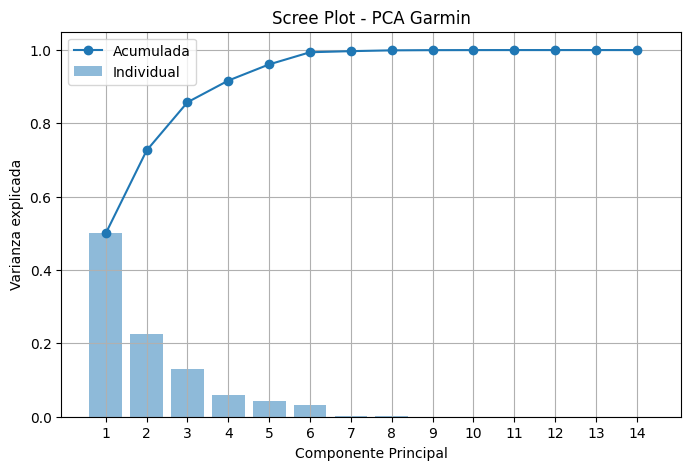

In [26]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), var_exp_acum, marker="o", label='Acumulada')
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, label='Individual')

plt.xlabel("Componente Principal")
plt.ylabel("Varianza explicada")
plt.title("Scree Plot - PCA Garmin")
plt.xticks(range(1, len(var_exp)+1))
plt.grid(True)
plt.legend()
plt.show()


In [27]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(var_exp))],
    index=X.columns
)

loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
distancia_km,0.363980,0.141103,0.017866,0.080135,-0.024262,0.063218,-0.084637,-0.130644,0.061403,0.018850,-0.497798,-0.422004,-0.148109,-0.600083
calorias,0.368040,0.114553,0.003881,0.083326,-0.047522,0.060555,-0.077801,-0.071149,0.106981,-0.081026,0.751858,-0.402774,-0.284122,0.034250
Tiempo_Total,0.364993,0.120483,-0.025415,0.139902,-0.057252,0.016059,-0.063315,-0.198811,0.096808,-0.182073,-0.048756,-0.126101,0.811268,0.256941
fc_media,0.264492,-0.230857,-0.010279,-0.413146,0.534914,0.147838,-0.472639,0.348306,0.050854,-0.193952,-0.000051,0.094019,0.048275,-0.043433
fc_max,0.235946,-0.269638,-0.347594,-0.261084,0.313399,0.236117,0.528170,-0.292910,-0.189674,0.324047,-0.014390,-0.102096,-0.001581,0.110872
cadencia_media,0.128314,0.064824,0.645188,-0.221034,0.099344,-0.347902,0.115898,0.195586,-0.003793,0.515846,-0.001438,-0.200655,0.110701,0.113963
cadencia_max,-0.153932,0.252635,-0.013898,0.595915,0.736187,-0.080469,0.054236,0.006034,0.034055,0.057305,0.011285,-0.027587,-0.012190,0.016328
ritmo_medio,0.012931,-0.387012,-0.476851,0.246640,-0.143060,-0.284526,-0.248692,0.265303,0.298811,0.455068,-0.017123,-0.160242,0.061525,0.045285
zancada_m,-0.172083,0.414034,-0.061307,-0.034809,-0.103431,0.708135,-0.130604,0.278939,0.053723,0.398247,-0.006177,-0.091691,0.097827,0.086448
pasos,0.365983,0.120647,0.030358,0.111939,-0.054607,0.015878,-0.175399,-0.119253,0.066165,0.021801,-0.373108,0.148427,-0.454848,0.645638


In [28]:
# PCA con 3 componentes principales


pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

# Varianza explicada por los 3 componentes
var_exp_3 = pca3.explained_variance_ratio_
var_exp_3

# Cargas de los tres primeros componentes

loadings3 = pd.DataFrame(
    pca3.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=X.columns
)

loadings3


,PC1,PC2,PC3
distancia_km,0.363980,0.141103,0.017866
calorias,0.368040,0.114553,0.003881
Tiempo_Total,0.364993,0.120483,-0.025415
fc_media,0.264492,-0.230857,-0.010279
fc_max,0.235946,-0.269638,-0.347594
cadencia_media,0.128314,0.064824,0.645188
cadencia_max,-0.153932,0.252635,-0.013898
ritmo_medio,0.012931,-0.387012,-0.476851
zancada_m,-0.172083,0.414034,-0.061307
pasos,0.365983,0.120647,0.030358


In [29]:
# Ordenar cargas para facilitar interpretación

for comp in ["PC1", "PC2", "PC3"]:
    print(f"\nCargas ordenadas para {comp}:")
    display(loadings3[comp].sort_values(ascending=False))



Cargas ordenadas para PC1:


,PC1
calorias,0.368040
tiempo_mov,0.367089
pasos,0.365983
Tiempo_Total,0.364993
distancia_km,0.363980
num_vueltas,0.351650
fc_media,0.264492
fc_max,0.235946
cadencia_media,0.128314
alt_max,0.034186



Cargas ordenadas para PC2:


,PC2
alt_max,0.467884
alt_min,0.425898
zancada_m,0.414034
cadencia_max,0.252635
distancia_km,0.141103
pasos,0.120647
Tiempo_Total,0.120483
calorias,0.114553
tiempo_mov,0.112998
num_vueltas,0.097947



Cargas ordenadas para PC3:


,PC3
cadencia_media,0.645188
pasos,0.030358
tiempo_mov,0.027360
distancia_km,0.017866
calorias,0.003881
fc_media,-0.010279
cadencia_max,-0.013898
Tiempo_Total,-0.025415
zancada_m,-0.061307
num_vueltas,-0.139987


In [30]:
# Usar los 3 primeros componentes principales para DBSCAN


from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)   # X_scaled viene de StandardScaler sobre X

print("Forma de X_pca3:", X_pca3.shape)  # (14, 3)


Forma de X_pca3: (14, 3)


In [31]:
# Búsqueda  de parámetros para DBSCAN


eps_values = [0.3, 0.5, 0.7, 1.0, 1.3]
min_samples_values = [2, 3, 4]


resultados = []

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_pca3)

        # Número de clusters (sin contar el ruido -1)
        labels_unicos = set(labels)
        if -1 in labels_unicos:
            labels_unicos.remove(-1)
        n_clusters = len(labels_unicos)
        n_ruido = list(labels).count(-1)

        # Silhouette solo si hay al menos 2 clusters
        if n_clusters >= 2:
            sil = silhouette_score(X_pca3, labels)
            ch  = calinski_harabasz_score(X_pca3, labels)
            dbi = davies_bouldin_score(X_pca3, labels)
        else:
            sil, ch, dbi = None, None, None

        resultados.append({
            "eps": eps,
            "min_samples": ms,
            "n_clusters": n_clusters,
            "n_ruido": n_ruido,
            "silhouette": sil,
            "calinski_harabasz": ch,
            "davies_bouldin": dbi
        })

resultados_dbscan = pd.DataFrame(resultados)
resultados_dbscan


,eps,min_samples,n_clusters,n_ruido,silhouette,calinski_harabasz,davies_bouldin
0,0.3,2,0,14,None,None,None
1,0.3,3,0,14,None,None,None
2,0.3,4,0,14,None,None,None
3,0.5,2,1,12,None,None,None
4,0.5,3,0,14,None,None,None
5,0.5,4,0,14,None,None,None
6,0.7,2,1,11,None,None,None
7,0.7,3,1,11,None,None,None
8,0.7,4,0,14,None,None,None
9,1.0,2,1,10,None,None,None


In [32]:
# DATOS PARA MODELOS NO SUPERVISADOS

features_unsup = [
    "distancia_km",
    "pasos",
    "fc_media",
    "fc_max",
    "cadencia_media",
    "zancada_m"
]

# Filtrar solo esas columnas y quitar NA
data_unsup = df[features_unsup].dropna()

from sklearn.preprocessing import StandardScaler

scaler_unsup = StandardScaler()
X_unsup = scaler_unsup.fit_transform(data_unsup)

print("Shape X_unsup:", X_unsup.shape)
data_unsup.head()


Shape X_unsup: (47, 6)


,distancia_km,pasos,fc_media,fc_max,cadencia_media,zancada_m
0,30.43,33436,173,190,173,0.91
1,7.45,7896,164,176,175,0.95
2,14.74,15654,176,191,169,0.94
3,12.12,12384,174,191,167,0.98
4,2.61,3150,164,184,162,0.83


In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Usamos los mismos datos reducidos que para DBSCAN
print("Forma de X_pca3:", X_pca3.shape)  # debería ser (14, 3)


Forma de X_pca3: (14, 3)


In [34]:
# Cálculo automático de bandwidth
bandwidth = estimate_bandwidth(X_pca3, quantile=0.3, n_samples=len(X_pca3))
print("Bandwidth estimado:", bandwidth)

# Ajuste del modelo Mean Shift

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca3)

labels_ms = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ms = len(np.unique(labels_ms))
print("Número de clusters encontrados por Mean Shift:", n_clusters_ms)
print("Centros de cluster (en PC1-PC3):")
cluster_centers


Bandwidth estimado: 2.78312724772177
Número de clusters encontrados por Mean Shift: 3
Centros de cluster (en PC1-PC3):


array([[-0.56495006, -0.6986665 ,  0.41850278],
       [-2.97218948,  2.92747445,  0.44783436],
       [ 7.51589536,  1.55111569,  0.21478698]])

In [35]:
X = df[vars_pca]

X = X.dropna()


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

print(X_pca3.shape)   # debería ser (14, 3)


(14, 3)


In [37]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_pca3, quantile=0.3, n_samples=len(X_pca3))
print("Bandwidth estimado:", bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca3)

labels_ms = ms.labels_
cluster_centers = ms.cluster_centers_

print("Número de clusters encontrados:", len(np.unique(labels_ms)))
print(cluster_centers)


Bandwidth estimado: 2.78312724772177
Número de clusters encontrados: 3
[[-0.56495006 -0.6986665   0.41850278]
 [-2.97218948  2.92747445  0.44783436]
 [ 7.51589536  1.55111569  0.21478698]]


In [38]:
df_pca = df.loc[X.index].copy()
df_pca["cluster_meanshift"] = labels_ms
df_pca.head()


,tipo,fecha,titulo,distancia_km,calorias,Tiempo_Total,fc_media,fc_max,cadencia_media,cadencia_max,...,ritmo_optimo,ascenso,descenso,zancada_m,pasos,num_vueltas,tiempo_mov,alt_min,alt_max,cluster_meanshift
0,Carrera,09/11/2025 07:06,Monterrey Carrera,30.43,2435,11589,173,190,173,185,...,225,225,225,0.91,33436,31,11542,515.0,574.0,2
1,Carrera,02/11/2025 06:47,San Pedro Garza GarcÃ­a Carrera,7.45,573,2678,164,176,175,188,...,176,--,--,0.95,7896,8,2668,598.0,602.0,0
2,Carrera,26/10/2025 06:37,Guadalupe Carrera,14.74,1235,5542,176,191,169,188,...,324,181,180,0.94,15654,15,5539,482.0,531.0,0
3,Carrera,05/10/2025 07:07,San Pedro Garza GarcÃ­a Carrera,12.12,990,4440,174,191,167,177,...,244,173,172,0.98,12384,13,4429,593.0,639.0,0
5,Carrera,06/06/2025 19:43,San NicolÃ¡s de los Garza Carrera,2.73,307,1489,163,189,138,176,...,198,--,--,0.78,3564,10,1439,496.0,498.0,0


In [39]:
df_pca["cluster_meanshift"].unique()


array([2, 0, 1])

In [40]:
df_pca["cluster_meanshift"].value_counts()


,count
cluster_meanshift,
0,11
1,2
2,1


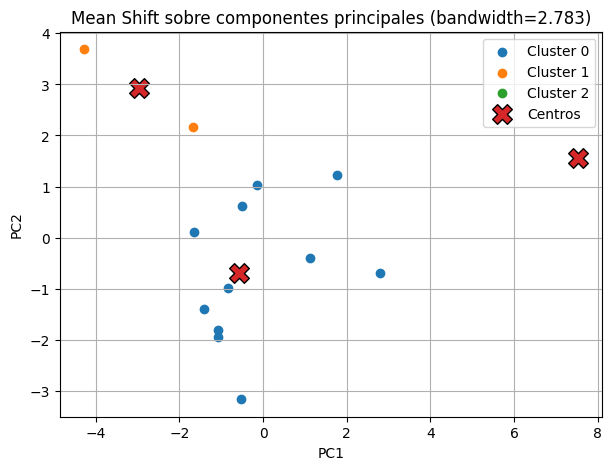

In [41]:
# Gráfica Mean Shift en el plano PC1 vs PC2
plt.figure(figsize=(7,5))

clusters_unicos = np.unique(labels_ms)
for c in clusters_unicos:
    mask = labels_ms == c
    plt.scatter(X_pca3[mask, 0], X_pca3[mask, 1],
                label=f"Cluster {c}")

# Centros de los clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker="X", s=200, edgecolor="k", label="Centros")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Mean Shift sobre componentes principales (bandwidth={bandwidth:.3f})")
plt.legend()
plt.grid(True)
plt.show()



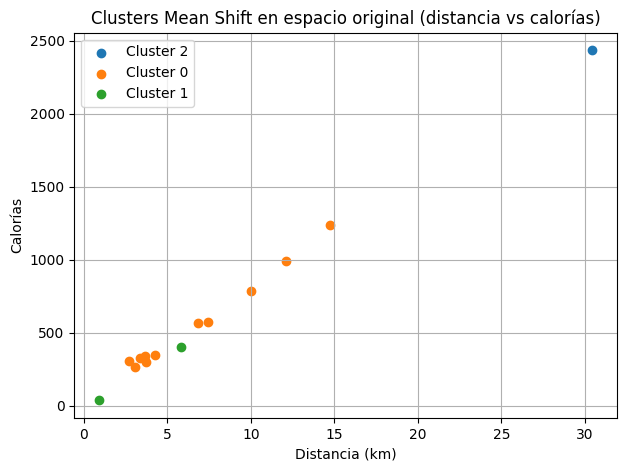

In [42]:
plt.figure(figsize=(7,5))

clusters_unicos = df_pca["cluster_meanshift"].unique()
for c in clusters_unicos:
    mask = df_pca["cluster_meanshift"] == c
    plt.scatter(df_pca.loc[mask, "distancia_km"],
                df_pca.loc[mask, "calorias"],
                label=f"Cluster {c}")

plt.xlabel("Distancia (km)")
plt.ylabel("Calorías")
plt.title("Clusters Mean Shift en espacio original (distancia vs calorías)")
plt.legend()
plt.grid(True)
plt.show()
